# Explore here

In [34]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import dump


data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")



In [35]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
data.drop(axis=1,columns=["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"], inplace=True)

data.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [37]:
X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 123)

In [38]:
model = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, n_init='auto', random_state=42)

In [39]:
y_train = list(model.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
9950,4.5694,38.38,-122.33,2
3547,5.6392,34.26,-118.60,3
4448,1.7292,34.07,-118.21,1
6984,4.6226,33.96,-118.02,4
4432,2.4375,34.08,-118.20,1


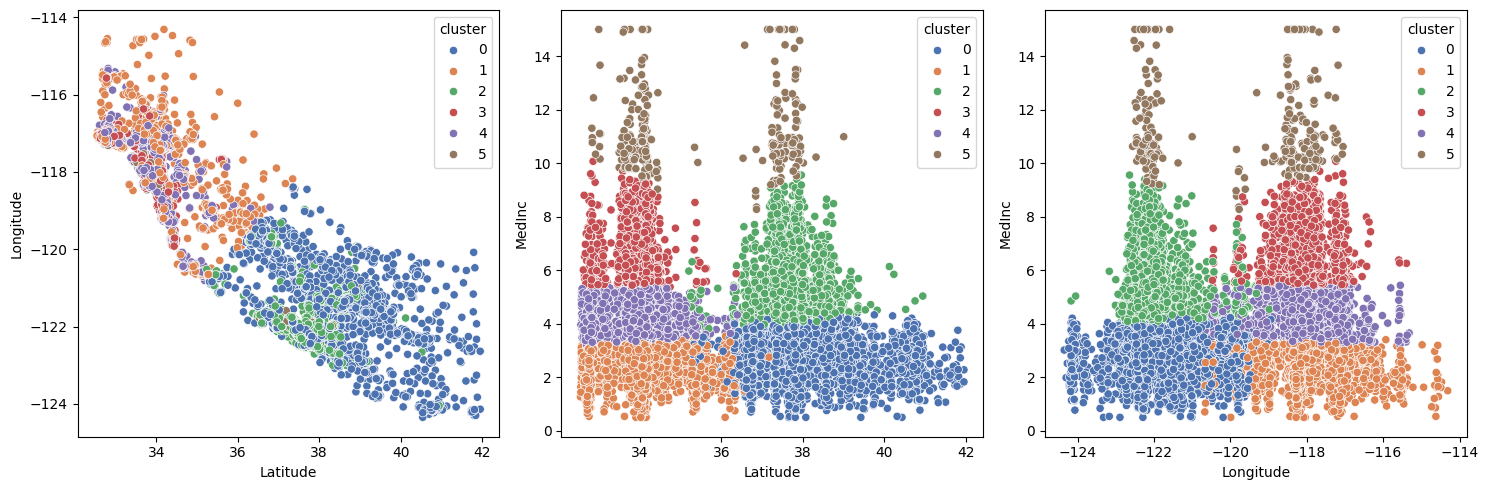

In [40]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue="cluster", palette="deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue="cluster", palette="deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue="cluster", palette="deep")
plt.tight_layout()

plt.show()

In [41]:
y_test = list(model.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
19121,3.7917,38.24,-122.64,0
20019,4.0217,36.09,-119.05,4
15104,4.0882,32.85,-116.98,4
3720,2.2377,34.20,-118.42,1
8938,4.4211,34.01,-118.47,4


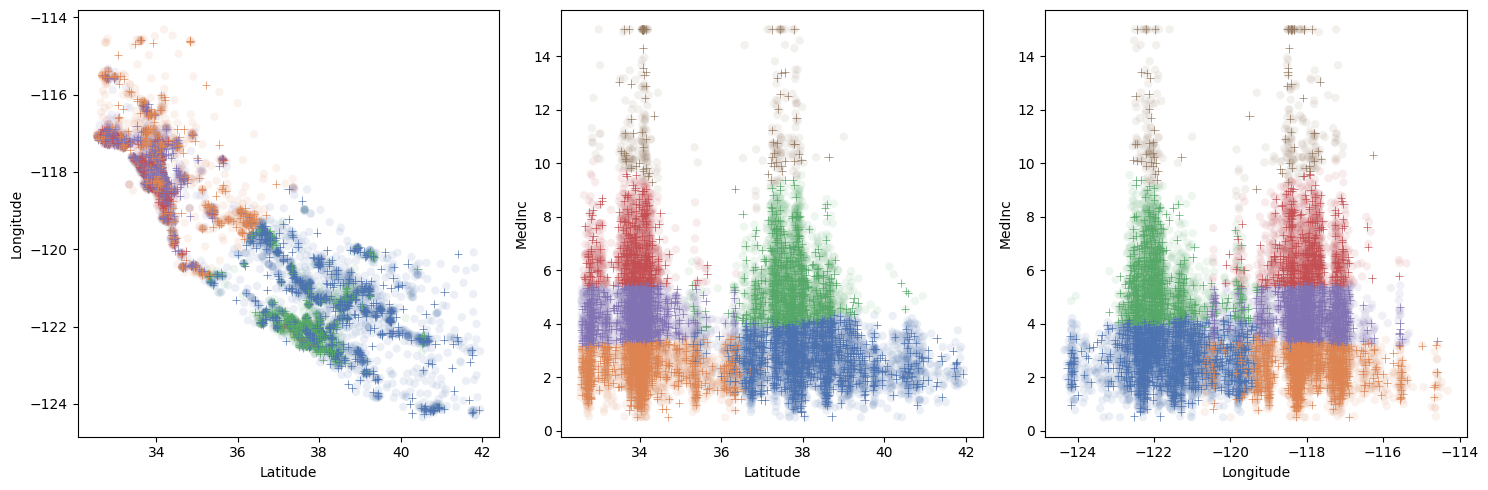

In [42]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

In [43]:
DT_model = DecisionTreeClassifier(random_state = 123)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

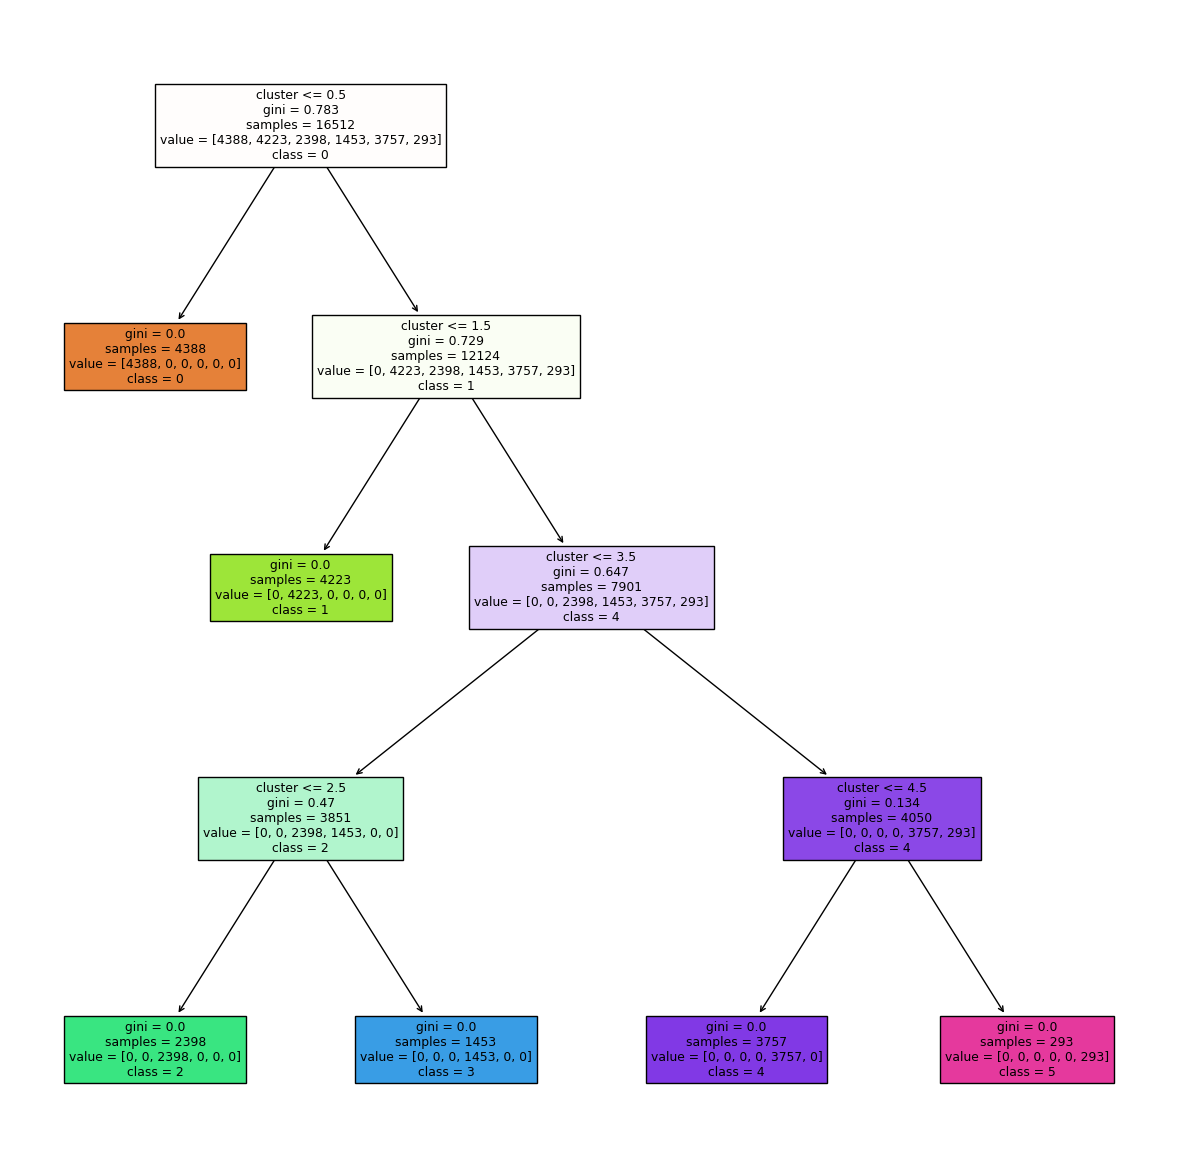

In [44]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(DT_model, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [45]:
y_pred = DT_model.predict(X_test)
y_pred

array([0, 4, 4, ..., 0, 1, 2], dtype=int32)

In [46]:
accuracy_score(y_test, y_pred)

1.0

In [47]:
with open('model_kmeans_123','wb') and open('DT_model_kmeans_123', 'wb') as files:
    dump(model, files)
    dump(DT_model, files)